## Lecture materials are here: https://github.com/cs544-wisc/s23/tree/main/lec

Lecture: https://mediaspace.wisc.edu/media/Tyler%20Caraza-Harter-Science%20180-02_03_23-09%3A51%3A06/1_0g4vt031

In [1]:
import torch

## Ints

In [2]:
2**31
#2^31

2147483648

In [3]:
torch.tensor(2**31, dtype=torch.int64)
#dtype = datatype

tensor(2147483648)

In [4]:

torch.tensor(2**31, dtype=torch.int32)
#this was supposed to error bc too large of a number...





tensor(-2147483648, dtype=torch.int32)

In [5]:

x = torch.tensor(2**31-1, dtype=torch.int32)
x

tensor(2147483647, dtype=torch.int32)

In [6]:
smallnum = x + 1 # overflow: add to the biggest number and it wraps around to the smallest
smallnum

tensor(-2147483648, dtype=torch.int32)

we only worry about errors during conversion (first line here)
once its already in a tensor, we have to worry about overflow
(overflow: its supposed to be a negative number but its positive. )

Underflow: wraps around to the biggest

In [7]:
smallnum - 1 # underflow

tensor(2147483647, dtype=torch.int32)

## Floats

In [8]:
import sys
sys.float_info 

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [9]:
big = sys.float_info.max
big #biggest possible float

1.7976931348623157e+308

In [10]:
small = -big
small

-1.7976931348623157e+308

In [11]:
2*big #no overflow. saturates at infinity

inf

In [12]:
2*small

-inf

In [13]:
(2*big) + (3*small)

nan

In [14]:
sys.float_info.dig
# this is the num of digits after decimal place
# where it is still faithfully preserved
#level of precision. 

15

In [15]:
# guaranteed 15 decimal points of precision (sys_info.dig)
x = 1.234567812345678
y = 1.234567812345679
x == y

False

In [16]:
# can't handle this level of precision
x = 1.2345678123456780
y = 1.2345678123456781
x == y

True

# 2-6: pytorch optimization

## Matrices and operations on them

In [17]:
torch.tensor(3.14) #this is a tensor. we are putting a value in it. 

tensor(3.1400)

In [18]:
torch.rand(1) # get 1 random number

tensor([0.3797])

In [19]:
torch.manual_seed(41) # set seed
A = torch.rand(10, 3) # get a tensor with 10 rows, 3 columns
A

# not a list of lists. rows can be diff sizes. 
#torch.rand(10, 3, 3) # 3 dimensional 

tensor([[0.2364, 0.2266, 0.8005],
        [0.1692, 0.2650, 0.7720],
        [0.1282, 0.7452, 0.8045],
        [0.6357, 0.5896, 0.6933],
        [0.8782, 0.5407, 0.1400],
        [0.9613, 0.8666, 0.4884],
        [0.2077, 0.3063, 0.0585],
        [0.8314, 0.4566, 0.8445],
        [0.6883, 0.4008, 0.1803],
        [0.6740, 0.1792, 0.3889]])

In [20]:
#let's learn about this tensor

A.dtype

torch.float32

In [21]:
A.shape

torch.Size([10, 3])

In [22]:
# is it in main memory, or on a GPU?
A.device

device(type='cpu')

In [23]:
#how much memory does this tensor take up?
# 32 bits/8bits per byte * 30 numbers (elements) = 120

A.element_size() * A.nelement()

120

tophat: torch.rand(1024,1024,dtype=torch.float32)

abouthow much memory to store these elements?

32 bits/8 bits per byte * 1024 * 1024 elements = 4194304 bytes = 4 MB (LEARN ABOUT CONVERTING BETWEEN BYTES AND KB TB ETC)

In [24]:
# how to change these aspects? 
#(dtype, shape, device)
A = torch.rand(10, 3, dtype=torch.float64)
#cuda means gpu
if torch.cuda.is_available():
    print("on GPU")
    A = A.to("cuda") #move it to GPU if it is available
A

#.to() can change device and number type
#no cuda GPU available :( )

tensor([[0.3779, 0.8043, 0.4584],
        [0.3383, 0.5398, 0.6478],
        [0.8789, 0.7605, 0.7240],
        [0.5918, 0.5291, 0.9478],
        [0.2252, 0.8642, 0.2887],
        [0.3894, 0.5066, 0.2819],
        [0.7151, 0.9181, 0.4914],
        [0.3961, 0.0870, 0.5667],
        [0.6436, 0.8821, 0.6333],
        [0.8248, 0.4814, 0.5264]], dtype=torch.float64)

In [25]:
A.reshape(2, 15)

tensor([[0.3779, 0.8043, 0.4584, 0.3383, 0.5398, 0.6478, 0.8789, 0.7605, 0.7240,
         0.5918, 0.5291, 0.9478, 0.2252, 0.8642, 0.2887],
        [0.3894, 0.5066, 0.2819, 0.7151, 0.9181, 0.4914, 0.3961, 0.0870, 0.5667,
         0.6436, 0.8821, 0.6333, 0.8248, 0.4814, 0.5264]], dtype=torch.float64)

In [26]:
A.reshape(2, -1)
#-1 means however long necessary to make it work

tensor([[0.3779, 0.8043, 0.4584, 0.3383, 0.5398, 0.6478, 0.8789, 0.7605, 0.7240,
         0.5918, 0.5291, 0.9478, 0.2252, 0.8642, 0.2887],
        [0.3894, 0.5066, 0.2819, 0.7151, 0.9181, 0.4914, 0.3961, 0.0870, 0.5667,
         0.6436, 0.8821, 0.6333, 0.8248, 0.4814, 0.5264]], dtype=torch.float64)

In [27]:
A.to(torch.float64) #change from float32 to float 64

tensor([[0.3779, 0.8043, 0.4584],
        [0.3383, 0.5398, 0.6478],
        [0.8789, 0.7605, 0.7240],
        [0.5918, 0.5291, 0.9478],
        [0.2252, 0.8642, 0.2887],
        [0.3894, 0.5066, 0.2819],
        [0.7151, 0.9181, 0.4914],
        [0.3961, 0.0870, 0.5667],
        [0.6436, 0.8821, 0.6333],
        [0.8248, 0.4814, 0.5264]], dtype=torch.float64)

In [28]:
A.shape

torch.Size([10, 3])

In [29]:
A.T.shape #take the transpose. flip rows and cols

torch.Size([3, 10])

## Calculation
* elementwise operations
* sigmoid
* mtx multiplication

In [30]:
A

tensor([[0.3779, 0.8043, 0.4584],
        [0.3383, 0.5398, 0.6478],
        [0.8789, 0.7605, 0.7240],
        [0.5918, 0.5291, 0.9478],
        [0.2252, 0.8642, 0.2887],
        [0.3894, 0.5066, 0.2819],
        [0.7151, 0.9181, 0.4914],
        [0.3961, 0.0870, 0.5667],
        [0.6436, 0.8821, 0.6333],
        [0.8248, 0.4814, 0.5264]], dtype=torch.float64)

In [31]:
A + A

tensor([[0.7559, 1.6086, 0.9167],
        [0.6765, 1.0796, 1.2956],
        [1.7578, 1.5209, 1.4481],
        [1.1837, 1.0582, 1.8956],
        [0.4503, 1.7285, 0.5773],
        [0.7787, 1.0133, 0.5637],
        [1.4302, 1.8362, 0.9828],
        [0.7922, 0.1739, 1.1334],
        [1.2872, 1.7642, 1.2666],
        [1.6497, 0.9629, 1.0528]], dtype=torch.float64)

In [32]:
A + 100 #add a constant to each value in mtx

tensor([[100.3779, 100.8043, 100.4584],
        [100.3383, 100.5398, 100.6478],
        [100.8789, 100.7605, 100.7240],
        [100.5918, 100.5291, 100.9478],
        [100.2252, 100.8642, 100.2887],
        [100.3894, 100.5066, 100.2819],
        [100.7151, 100.9181, 100.4914],
        [100.3961, 100.0870, 100.5667],
        [100.6436, 100.8821, 100.6333],
        [100.8248, 100.4814, 100.5264]], dtype=torch.float64)

In [33]:
torch.sigmoid(torch.tensor(0.0)) #0 goes to 0.5
#useful in ML
# shaped like S curve
#saturates at 0 and 1

tensor(0.5000)

In [34]:
print(torch.sigmoid(torch.tensor(99)))
print(torch.sigmoid(torch.tensor(-5)))
print(torch.sigmoid(torch.tensor(5)))

tensor(1.)
tensor(0.0067)
tensor(0.9933)


In [35]:
torch.sigmoid(A) 
# element wise sigmoid() on each element

tensor([[0.5934, 0.6909, 0.6126],
        [0.5838, 0.6318, 0.6565],
        [0.7066, 0.6815, 0.6735],
        [0.6438, 0.6293, 0.7207],
        [0.5561, 0.7035, 0.5717],
        [0.5961, 0.6240, 0.5700],
        [0.6715, 0.7147, 0.6204],
        [0.5977, 0.5217, 0.6380],
        [0.6556, 0.7073, 0.6532],
        [0.6953, 0.6181, 0.6286]], dtype=torch.float64)

In [36]:
# matrix multiplication
# @ is matrix multiplication (can be the dot product in other cases)
# rule 1: column count of a matrix must equals row count of the next (when multiplying)
# rule 2: final row count equals that of first matrix, final col count equals that of last matrix
x = torch.rand(8, 4)
y = torch.rand(4, 99)
z = torch.rand(99, 2)
x @ y @ z

tensor([[45.0700, 44.8305],
        [44.9377, 44.8057],
        [56.2928, 57.5919],
        [44.6117, 44.3319],
        [30.5819, 31.1441],
        [48.3032, 48.3144],
        [43.5691, 43.3780],
        [42.1796, 42.4347]])

## Linear Model

In [37]:
# goal: make some kind of prediction for each of the 10 rows
data = torch.rand(10, 3)
data

tensor([[0.0257, 0.6330, 0.9769],
        [0.5736, 0.8785, 0.5516],
        [0.0558, 0.6842, 0.4109],
        [0.9854, 0.9863, 0.4046],
        [0.0088, 0.3526, 0.7777],
        [0.5554, 0.6215, 0.9914],
        [0.1015, 0.1528, 0.4994],
        [0.7564, 0.0591, 0.2893],
        [0.0270, 0.1165, 0.5987],
        [0.0746, 0.4451, 0.2884]])

In [38]:
# goal: make 1 predictions for each row
model = torch.nn.Linear(3, 1) 
#nn = neural networks
#first arg is in_features: 3 values coming in
#2nd is out_features: 1 predictions
model
#model is just obj w tensors!

Linear(in_features=3, out_features=1, bias=True)

In [39]:
print(model.weight.T.shape) #should work to mult data * this 
model.weight.T

torch.Size([3, 1])


tensor([[0.5265],
        [0.2231],
        [0.2057]], grad_fn=<PermuteBackward0>)

In [40]:
model.bias #will add this in after mtx mult

Parameter containing:
tensor([0.1124], requires_grad=True)

In [41]:
data @ model.weight.T + model.bias

#can treat each of these as a prediction for 
# what our data tensor values are. 
# gonna be pretty bad! bc we just multiplied the data by a mtx of random numbers. 

tensor([[0.4682],
        [0.7239],
        [0.3790],
        [0.9345],
        [0.3557],
        [0.7475],
        [0.3027],
        [0.5833],
        [0.2758],
        [0.3103]], grad_fn=<AddBackward0>)

In [42]:
# model is a "callable" object, meaning it works like function
model(data) #gets same numbers as above (returns predictions for me!)

tensor([[0.4682],
        [0.7239],
        [0.3790],
        [0.9345],
        [0.3557],
        [0.7475],
        [0.3027],
        [0.5833],
        [0.2758],
        [0.3103]], grad_fn=<AddmmBackward0>)

In [43]:
# make our own callable object

class Mult:
    def __init__(self, factor): #constructor. must put in self
        self.factor = factor #attribute
        
    def __call__(self, number): #making the class callable with a special method. gets called implicitly/automatically. 
        return number * self.factor
        #if not had this, couldn't call. 
double = Mult(2)
double(10)

20

In [44]:
triple = Mult(3)
triple(5)

15

In [45]:
#this is what ppl r doing w these model objs!

## Optimization

Rn the model we created has some random number basically. bad predictions prob. what if we put better numbers in there? better predictions!

Let's optimize a function

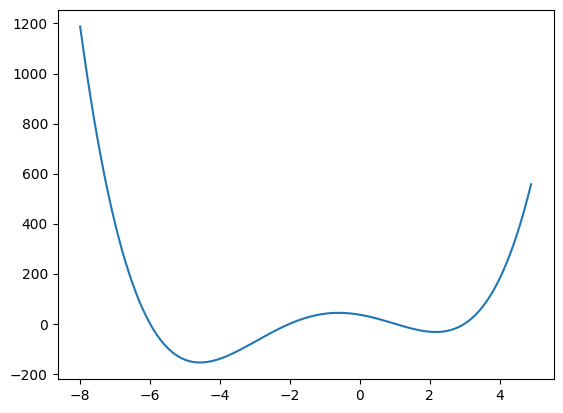

In [46]:
import matplotlib.pyplot as plt
#had to pip3 install matplotlib

def f(x):
    return (x - 1) * (x + 2) * (x - 3) * (x + 6)

x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)
# optimization could be minimization or maximization
# goal: choose x that minimizes y

#this will draw a shape for us
# we can see to min y, we want x=about -4.5

In [47]:
x = torch.tensor(0.0, requires_grad=True) #our first guess. requires gradient
y = f(x)
y.backward() #required if we want to figure out gradient. this is saying we want slope of y over x
y
#is 36 good or bad, we don't know. 
#let's figure our shape of curve at x=0.
#if its flat, maybe we are near bottom. if its sloped, we can prob change x to get better value
#to do that, look at gradient
 

tensor(36., grad_fn=<MulBackward0>)

In [48]:
#gradient - slope at a particular location.
x.grad

#gradient is -24 and we want to make y smallest. 
# should i make x bigger or smaller?
# bigger (for now)! bigger x * negative slope = smaller y
#let's try a bigger x value then. 

tensor(-24.)

In [49]:
x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr = 0.1) #stochastic gradient descent
# we want to find good x values, so its in the []
#lr is learning rate
# can set parameter maximize = True if want to maximize. it is automatically set to false. 

y = f(x)
y.backward()
print("y: ", y) # = 36 like before
print("x.grad: ", x.grad) # = -24 like before
optimizer.step()    # make a small change to the variables being optimized, based on the gradient
print("new x: ", x) # we wanted to make x bigger. by how much? well we'll mult gradient by the learning rate. 
y = f(x) #compute y again
print("new y: ", y)

#we started w arbitrary x value and we just made it a little better!

y:  tensor(36., grad_fn=<MulBackward0>)
x.grad:  tensor(-24.)
new x:  tensor(2.4000, requires_grad=True)
new y:  tensor(-31.0464, grad_fn=<MulBackward0>)


y tensor(36., grad_fn=<MulBackward0>)
y tensor(29.3194, grad_fn=<MulBackward0>)
y tensor(18.2556, grad_fn=<MulBackward0>)
y tensor(2.5687, grad_fn=<MulBackward0>)


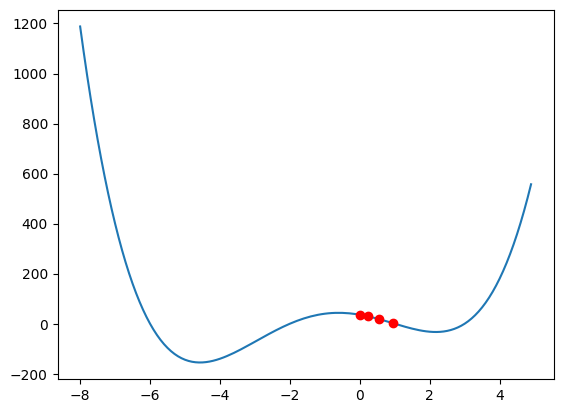

In [51]:
# how do we do that in a loop?
x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)



x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)   # lr is learning rate

for epoch in range(4):
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro")
    y.backward()
    print("y", y)
    optimizer.step()    # doesn't set the grad, it adds to x.grad
    optimizer.zero_grad()   # set x.grad = 0 before the next loop
    
#idk why its not showing the plot. basically the red circle is going off to the right